# Bike sharing

## Data import

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('bike_sharing_model.csv')

In [4]:
df.shape

(12226, 15)

In [5]:
df.sample(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
11790,214,2011-01-10,1,0,1,4,0,1,1,1,0.10,0.1212,0.54,0.1343,3
4969,13576,2012-07-24,3,1,7,20,0,2,1,1,0.74,0.6970,0.66,0.1642,523
9024,248,2011-01-11,1,0,1,16,0,2,1,2,0.16,0.1515,0.86,0.2239,76
3383,9973,2012-02-25,1,1,2,13,0,6,0,1,0.32,0.2879,0.31,0.4925,226
5911,3715,2011-06-08,2,0,6,16,0,3,1,1,0.92,0.8788,0.40,0.2239,233
7779,15379,2012-10-07,4,1,10,23,0,0,0,1,0.36,0.3485,0.93,0.1343,80
674,1299,2011-02-27,1,0,2,7,0,0,0,1,0.24,0.2424,0.87,0.1343,14
7823,16789,2012-12-07,4,1,12,7,0,5,1,3,0.28,0.2727,0.81,0.1642,215
6016,2368,2011-04-13,2,0,4,13,0,3,1,2,0.44,0.4394,0.77,0.1940,61
3243,11318,2012-04-21,2,1,4,18,0,6,0,2,0.68,0.6364,0.47,0.4925,416


In [6]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

## Split categorical/continuos variables

In [7]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [8]:
df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

In [9]:
df_categorical=df[['season', 'mnth', 'hr', 'yr', 'holiday', 'weekday', 'workingday', 'weathersit']]
df_categorical.head()

,season,mnth,hr,yr,holiday,weekday,workingday,weathersit
0,3,9,7,0,0,6,0,2
1,1,1,10,1,1,1,0,2
2,3,8,16,0,0,2,1,1
3,4,11,9,1,0,2,1,3
4,3,8,18,0,0,1,1,1


In [10]:
df_numerical=df[['temp', 'atemp', 'hum', 'windspeed','cnt']]
df_numerical.head()

,temp,atemp,hum,windspeed,cnt
0,0.46,0.4545,0.77,0.1940,37
1,0.14,0.1364,0.59,0.1940,126
2,0.72,0.6515,0.32,0.1343,444
3,0.32,0.3030,0.81,0.3284,110
4,0.70,0.6515,0.65,0.1940,483


## Categorical data

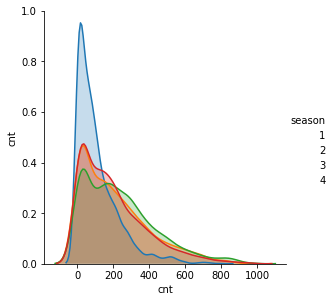

In [11]:
sns.pairplot(data=df[["season","cnt"]], hue="season", height=4)

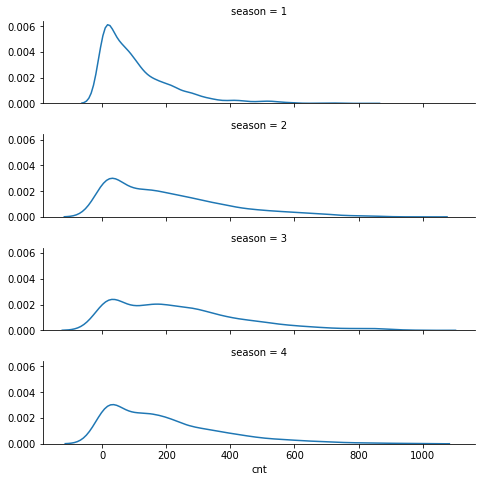

In [12]:
g = sns.FacetGrid(df, row="season", 
                  height=1.7, aspect=4,)
g.map(sns.kdeplot, "cnt")

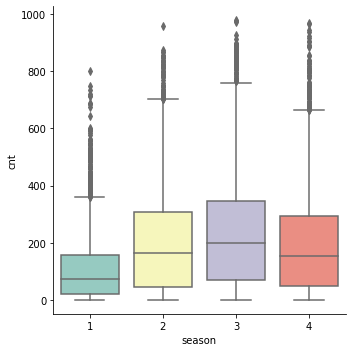

In [13]:
sns.catplot(data=df, x="season", y="cnt",kind="box", palette="Set3")

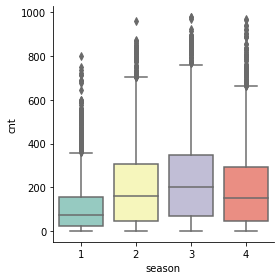

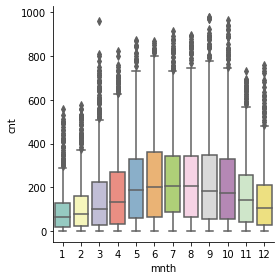

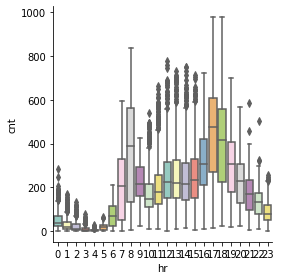

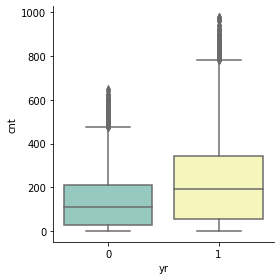

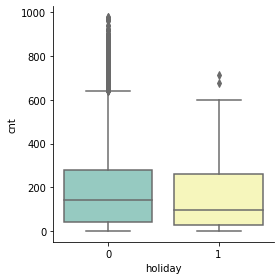

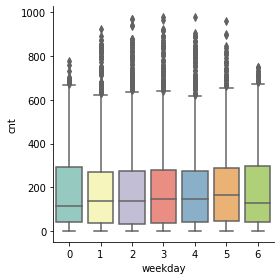

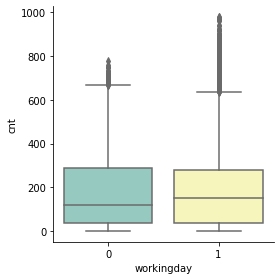

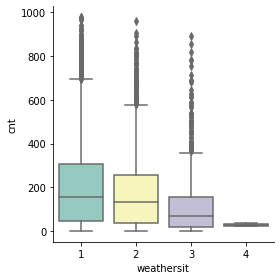

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

for i in df_categorical.columns:
    sns.catplot(data=df, x=i, y="cnt",
            kind="box", palette="Set3",height=4);
plt.show()



In [15]:
dummies = pd.get_dummies(df_categorical.astype(str),drop_first=True) 

dummies.tail()

,season_2,season_3,season_4,mnth_10,mnth_11,mnth_12,mnth_2,mnth_3,mnth_4,mnth_5,...,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_2,weathersit_3,weathersit_4
12221,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
12222,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
12223,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12224,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
12225,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0


## Numerical data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2c9242a450>,
      dtype=object)

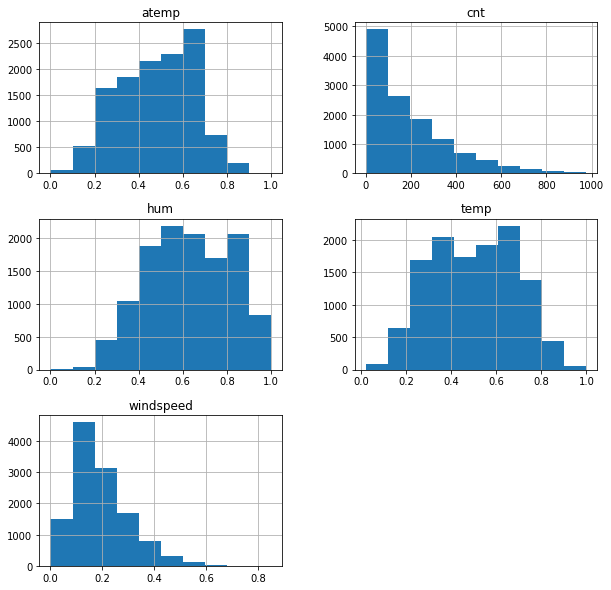

In [16]:
df_numerical.hist(figsize=(10,10))

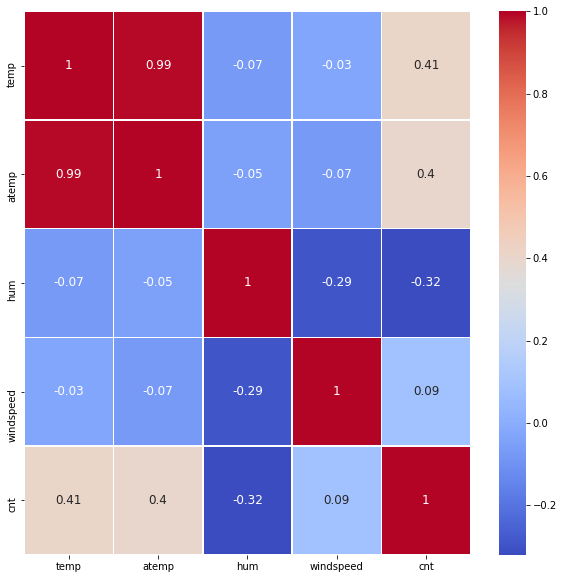

In [17]:
#We can visualise the correlation using a heatmap in Seaborn

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize = (10,10))
sns.heatmap(data=df_numerical.corr().round(2), cmap='coolwarm', linewidths=.5, annot=True, annot_kws={"size":12})
plt.show()

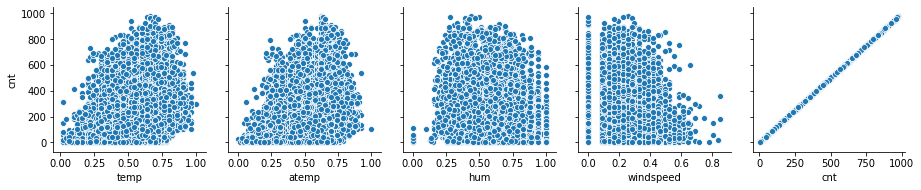

In [18]:
# visualize the relationship between the features and the response using scatterplots
%matplotlib inline
import seaborn as sns
sns.pairplot(df_numerical, x_vars=df_numerical.columns, y_vars='cnt')

In [19]:
df_numerical=df_numerical.drop(["temp"], axis=1)

## Standarize

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(df_numerical)
scaled_df = pd.DataFrame(scaler.transform(df_numerical))
scaled_df.columns = df_numerical.columns

scaled_df.head()

,atemp,hum,windspeed,cnt
0,-0.130057,0.736673,0.030371,-0.841536
1,-1.991066,-0.200437,0.030371,-0.347996
2,1.022470,-1.606103,-0.459190,1.415443
3,-1.016391,0.944920,1.132498,-0.436722
4,1.022470,0.111933,0.030371,1.631713


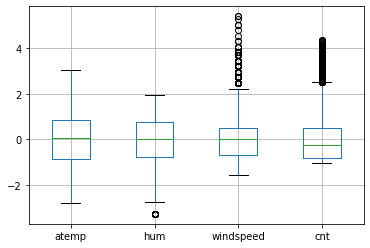

In [21]:
scaled_df.boxplot()

In [22]:
X_numerical=scaled_df.iloc[:,:-1]

In [23]:
print(dummies.shape)
print(X_numerical.shape)

dummies.tail()

(12226, 49)
(12226, 3)


,season_2,season_3,season_4,mnth_10,mnth_11,mnth_12,mnth_2,mnth_3,mnth_4,mnth_5,...,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_2,weathersit_3,weathersit_4
12221,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
12222,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
12223,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12224,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
12225,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0


In [24]:
X=pd.concat([dummies,X_numerical], axis = 1)
X.tail()

,season_2,season_3,season_4,mnth_10,mnth_11,mnth_12,mnth_2,mnth_3,mnth_4,mnth_5,...,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_2,weathersit_3,weathersit_4,atemp,hum,windspeed
12221,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0.579595,1.049044,-0.825746
12222,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0.490669,1.049044,0.765123
12223,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-0.041131,0.476365,-1.560497
12224,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,-0.041131,-1.762288,0.887308
12225,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0.934129,1.361414,-0.213999


### Separate Train/Test sets


In [25]:
y=df['cnt']

In [26]:
from sklearn.model_selection import train_test_split

#SPLIT DATA INTO TRAIN AND TEST SET
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size =0.30, #by default is 75%-25%
                                                    random_state= 123) #fix random seed for replicability

print(X_train.shape, X_test.shape)

(8558, 52) (3668, 52)


## Models

In [39]:
from sklearn.model_selection import GridSearchCV

def gs_regression(model, par) :
    gs = GridSearchCV(model, par,cv=3,scoring ='neg_mean_absolute_error') 
    gs = gs.fit(X_train,y_train)

    #summarize the results of your GRIDSEARCH
    print('***GRIDSEARCH RESULTS***')
    print("Best score: %f using %s" % (gs.best_score_, gs.best_params_))
    means = gs.cv_results_['mean_test_score']
    stds = gs.cv_results_['std_test_score']
    params = gs.cv_results_['params']
    #for mean, stdev, param in zip(means, stds, params):
    #    print("%f (%f) with: %r" % (mean, stdev, param))
    
    y_pred_train=gs.predict(X_train)
    y_pred_test=gs.predict(X_test) 
        
    from sklearn import metrics
    print()
    print("MAE  train %.3f    test %06.3f" % (metrics.mean_absolute_error(y_train, y_pred_train), metrics.mean_absolute_error(y_test, y_pred_test) ) )
    print("MSE  train %.3f test %.3f" % (metrics.mean_squared_error(y_train, y_pred_train), metrics.mean_squared_error(y_test, y_pred_test)) ) 
    print("RMSE train %.3f   test %.3f" % (np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)), np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))) ) 
    print("r2   train %.3f     test %.3f" % (metrics.r2_score(y_train, y_pred_train), metrics.r2_score(y_test, y_pred_test)) )

In [40]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression() 
parameters = {}

gs_regression(regressor, parameters)

***GRIDSEARCH RESULTS***
Best score: -286685549465.565125 using {}

MAE  train 74.634    test 75.724
MSE  train 10138.537 test 10698.726
RMSE train 100.690   test 103.435
r2   train 0.686     test 0.675


In [41]:
from sklearn.linear_model import Ridge

regressor = Ridge()
parameters = {"alpha": [0.001,0.01,0.1,1,10], "normalize": [True, False]}

gs_regression(regressor, parameters)


***GRIDSEARCH RESULTS***
Best score: -75.318068 using {'alpha': 0.01, 'normalize': True}

MAE  train 74.641    test 75.621
MSE  train 10164.463 test 10713.960
RMSE train 100.819   test 103.508
r2   train 0.686     test 0.675


In [42]:
from sklearn.linear_model import Lasso

regressor = Lasso()
parameters = {"alpha": [0.001,0.01,0.1,1,10], "normalize": [True, False]}

gs_regression(regressor, parameters)


***GRIDSEARCH RESULTS***
Best score: -75.222789 using {'alpha': 0.01, 'normalize': True}

MAE  train 74.680    test 75.609
MSE  train 10270.257 test 10792.473
RMSE train 101.342   test 103.887
r2   train 0.682     test 0.672


In [43]:
from sklearn.neighbors import KNeighborsRegressor

regressor = KNeighborsRegressor()

parameters = {'n_neighbors': np.arange(20,50,10),
              'p': [1,2]
            }

gs_regression(regressor, parameters)


***GRIDSEARCH RESULTS***
Best score: -84.934774 using {'n_neighbors': 20, 'p': 1}

MAE  train 76.234    test 82.042
MSE  train 11362.984 test 13312.117
RMSE train 106.597   test 115.378
r2   train 0.649     test 0.596


In [44]:
from sklearn.tree import DecisionTreeRegressor 

regressor = DecisionTreeRegressor()
parameters = {"max_depth": np.arange(1,8), 
              "min_samples_leaf": [5]}

gs_regression(regressor, parameters)


***GRIDSEARCH RESULTS***
Best score: -87.892107 using {'max_depth': 7, 'min_samples_leaf': 5}

MAE  train 83.732    test 89.650
MSE  train 12143.328 test 14117.392
RMSE train 110.197   test 118.817
r2   train 0.624     test 0.571


In [45]:
from sklearn.ensemble import RandomForestRegressor 

regressor = RandomForestRegressor()
parameters = {"n_estimators":[5,10,100], "criterion": ['mse'], 
              "min_samples_leaf": [10,30], "random_state" : [42]}

gs_regression(regressor, parameters)


***GRIDSEARCH RESULTS***
Best score: -59.240706 using {'criterion': 'mse', 'min_samples_leaf': 10, 'n_estimators': 100, 'random_state': 42}

MAE  train 46.152    test 55.409
MSE  train 4586.523 test 6659.270
RMSE train 67.724   test 81.604
r2   train 0.858     test 0.798


In [46]:
from sklearn.svm import SVR

regressor = SVR()
parameters = {'C': [0.1,10,1000],
             'epsilon': [0.01,1],
             'gamma':['auto'],
             'kernel': ['linear','poly'],
             'degree': [2,3]
             }

gs_regression(regressor, parameters)

***GRIDSEARCH RESULTS***
Best score: -57.689575 using {'C': 1000, 'degree': 2, 'epsilon': 0.01, 'gamma': 'auto', 'kernel': 'poly'}

MAE  train 49.316    test 52.127
MSE  train 6122.976 test 6699.109
RMSE train 78.249   test 81.848
r2   train 0.811     test 0.797


In [47]:
from sklearn.neural_network import MLPRegressor

regressor = MLPRegressor(random_state=0)
parameters = {'hidden_layer_sizes': [(10, 5), (20,10,5)],
              'solver' : ['sgd'],
              'batch_size': [20],
              'learning_rate' : ['constant'],
              'alpha':10.0 ** -np.arange(1, 3),
              'max_iter':[5000]}

gs_regression(regressor, parameters)

***GRIDSEARCH RESULTS***
Best score: -141.285204 using {'alpha': 0.01, 'batch_size': 20, 'hidden_layer_sizes': (20, 10, 5), 'learning_rate': 'constant', 'max_iter': 5000, 'solver': 'sgd'}

MAE  train 141.498    test 141.988
MSE  train 32333.302 test 32952.156
RMSE train 179.815   test 181.527
r2   train -0.000     test -0.000


In [48]:
from sklearn.ensemble import AdaBoostRegressor

regressor = AdaBoostRegressor() # base_estimator=DecisionTreeRegressor(max_depth=3)
parameters = {"n_estimators":[5,10,100,300], "learning_rate":[0.001, 0.1,0.5,1,2], 
              "loss": ['linear', 'square'], "random_state" : [0]}

gs_regression(regressor, parameters)

***GRIDSEARCH RESULTS***
Best score: -92.992784 using {'learning_rate': 2, 'loss': 'square', 'n_estimators': 100, 'random_state': 0}

MAE  train 98.856    test 99.746
MSE  train 13880.321 test 14384.995
RMSE train 117.815   test 119.937
r2   train 0.571     test 0.563


## Residuals

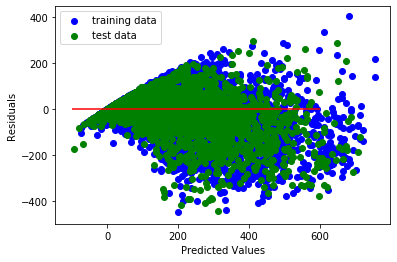

In [83]:
model_rf=RandomForestRegressor(criterion='mse', min_samples_leaf=10, n_estimators=100, random_state=42)
model_rf.fit(X_train,y_train)

y_train_pred=model.predict(X_train)
y_test_pred=model.predict(X_test)

error_train=y_train_pred-y_train
error_test=y_test_pred-y_test

error_train.describe()


plt.scatter(y_train_pred,error_train, c="b", label="training data")
plt.scatter(y_test_pred,error_test, c="g", label="test data")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.legend(loc="upper left")
plt.hlines(y=0, xmin=-100, xmax=600, color="r")
plt.show()

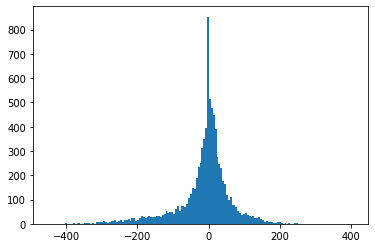

In [82]:
plt.hist(error_train, bins='auto')  # arguments are passed to np.histogram
plt.show()

# Making the predictions

In [49]:
df2 = pd.read_csv('bike_sharing_predictions.csv')

In [50]:
df2_categorical=df2[['season', 'mnth', 'hr', 'yr', 'holiday', 'weekday', 'workingday', 'weathersit']]
df2_numerical=df2[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]

dummies2 = pd.get_dummies(df2_categorical.astype(str),drop_first=True) 
df2_numerical=df2_numerical.drop(["temp"], axis=1)

scaled_df2 = pd.DataFrame(scaler.transform(df2_numerical))
scaled_df2.columns = df2_numerical.columns

X2_numerical=scaled_df2.iloc[:,:-1]
X2=pd.concat([dummies2,X2_numerical], axis = 1)

y2=df2['cnt']

In [51]:
model = RandomForestRegressor(n_estimators=100, criterion="mse", 
              min_samples_leaf=10)

model.fit(X_train,y_train)
# we could retrain with the entire dataset

y_predictions=model.predict(X2)

In [52]:
y_predictions


array([257.05163422, 210.89314944, 396.07461027, ..., 174.67055296,
       232.29941184, 145.45142047])

In [53]:
from sklearn import metrics

print("MAE  train %.3f"  % (metrics.mean_absolute_error(y2, y_predictions)) ) 
print("MSE  train %.3f " % (metrics.mean_squared_error(y2, y_predictions)) ) 
print("RMSE train %.3f " % (np.sqrt(metrics.mean_squared_error(y2, y_predictions))) ) 
print("r2   train %.3f " % ( metrics.r2_score(y2, y_predictions)) )


MAE  train 53.919
MSE  train 6233.578 
RMSE train 78.953 
r2   train 0.816 


In [54]:
np.savetxt("model_predictions.csv", y_predictions.astype(int), delimiter=",", fmt='%.0f')

## Variable importance

In [55]:
from sklearn.ensemble import RandomForestRegressor 
import numpy as np

rf = RandomForestRegressor(n_estimators=100, min_samples_leaf=10)
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=10,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [56]:
from sklearn import metrics

print("MAE train: ", metrics.mean_absolute_error(y_train, rf.predict(X_train))) 
print("MSE train: ",metrics.mean_squared_error(y_train, rf.predict(X_train)))
print("RMSE train: ",np.sqrt(metrics.mean_squared_error(y_train, rf.predict(X_train))))
print("r2: ",np.sqrt(metrics.r2_score(y_train, rf.predict(X_train))))

print("MAE test: ", metrics.mean_absolute_error(y_test, rf.predict(X_test))) 
print("MSE test: ",metrics.mean_squared_error(y_test, rf.predict(X_test)))
print("RMSE test: ",np.sqrt(metrics.mean_squared_error(y_test, rf.predict(X_test))))
print("r2: ",np.sqrt(metrics.r2_score(y_test, rf.predict(X_test))))

MAE train:  46.347928611405585
MSE train:  4652.882020334913
RMSE train:  68.21203720997426
r2:  0.9252540969859578
MAE test:  55.78177053677692
MSE test:  6792.650809878448
RMSE test:  82.41753945537593
r2:  0.8909631717012724


In [57]:
# Install the package in the current Jupyter kernel
import sys
!conda config --append channels conda-forge
!conda install --yes --prefix {sys.prefix} lime
#!{sys.executable} -m pip install lime

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.9.2
  latest version: 4.10.0

Please update conda by running

    $ conda update -n base conda



## Package Plan ##

  environment location: /home/mausoto/anaconda3

  added / updated specs:
    - lime


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.10.0               |   py37h06a4308_0         2.9 MB
    ------------------------------------------------------------
                                           Total:         2.9 MB

The following NEW packages will be INSTALLED:

  lime               conda-forge/noarch::lime-0.2.0.1-pyh9f0ad1d_0

The following packages will be UPDATED:

  conda              conda-forge::conda-4.9.2-py37h89c1867~ --> pkgs/main::conda-4.10.0-py37h06a4308_0



conda-4.10.0         | 2.9 MB    | ##################################### | 100% 
Preparing tra

In [58]:
import lime
import lime.lime_tabular

In [59]:
X_train.columns
# CATEGORICAL: CHAS(3), RAD(8) 

Index(['season_2', 'season_3', 'season_4', 'mnth_10', 'mnth_11', 'mnth_12',
       'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8',
       'mnth_9', 'hr_1', 'hr_10', 'hr_11', 'hr_12', 'hr_13', 'hr_14', 'hr_15',
       'hr_16', 'hr_17', 'hr_18', 'hr_19', 'hr_2', 'hr_20', 'hr_21', 'hr_22',
       'hr_23', 'hr_3', 'hr_4', 'hr_5', 'hr_6', 'hr_7', 'hr_8', 'hr_9', 'yr_1',
       'holiday_1', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'workingday_1', 'weathersit_2',
       'weathersit_3', 'weathersit_4', 'atemp', 'hum', 'windspeed'],
      dtype='object')

In [60]:
categorical_features=list(range(49))

In [61]:
import numpy as np
X_lime=np.array(X_train)

In [62]:
X_lime

array([[ 1.        ,  0.        ,  0.        , ...,  0.84520312,
        -0.98136263,  0.27556155],
       [ 0.        ,  0.        ,  1.        , ...,  0.04720987,
         0.996982  , -0.70356052],
       [ 0.        ,  0.        ,  1.        , ..., -1.10473201,
         0.9449203 , -0.82574577],
       ...,
       [ 0.        ,  1.        ,  0.        , ...,  1.8204632 ,
         0.63255009, -0.70356052],
       [ 0.        ,  0.        ,  0.        , ..., -2.16833299,
        -1.24167114,  1.62205941],
       [ 1.        ,  0.        ,  0.        , ..., -0.30732379,
        -2.38702856, -0.82574577]])

In [63]:
explainer = lime.lime_tabular.LimeTabularExplainer(X_lime, feature_names=X_train.columns, categorical_features=categorical_features, verbose=True, mode='regression')

In [64]:
i = 100
exp = explainer.explain_instance(X_lime[i], rf.predict, num_features=10)

Intercept 688.3346020396751
Prediction_local [128.13712757]
Right: 158.40641785598726


In [65]:
exp.show_in_notebook(show_table=True)

In [66]:
# Install the package in the current Jupyter kernel
import sys
!conda install --yes --prefix {sys.prefix} shap
#!{sys.executable} -m pip install shap

Solving environment: done

## Package Plan ##

  environment location: /home/mausoto/anaconda3

  added / updated specs:
    - shap


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    slicer-0.0.7               |     pyhd8ed1ab_0          16 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          16 KB

The following NEW packages will be INSTALLED:

  shap               conda-forge/linux-64::shap-0.37.0-py37h10a2094_0
  slicer             conda-forge/noarch::slicer-0.0.7-pyhd8ed1ab_0



slicer-0.0.7         | 16 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


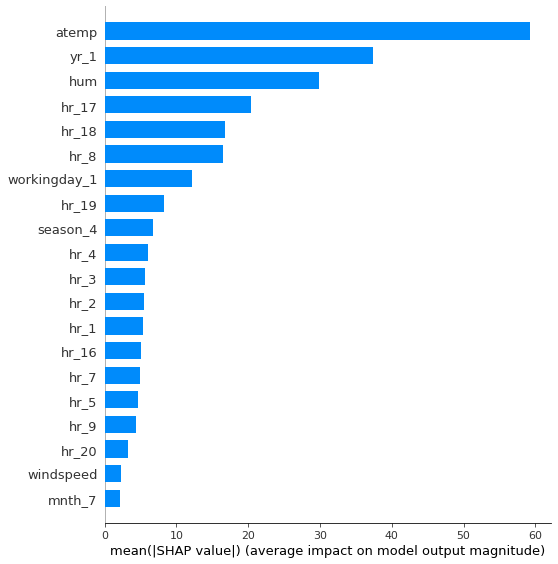

In [67]:
import shap  

explainer_rf = shap.TreeExplainer(rf,categorical_features=categorical_features)
shap_values = explainer_rf.shap_values(X_train)

shap.summary_plot(shap_values, X_train, plot_type="bar")


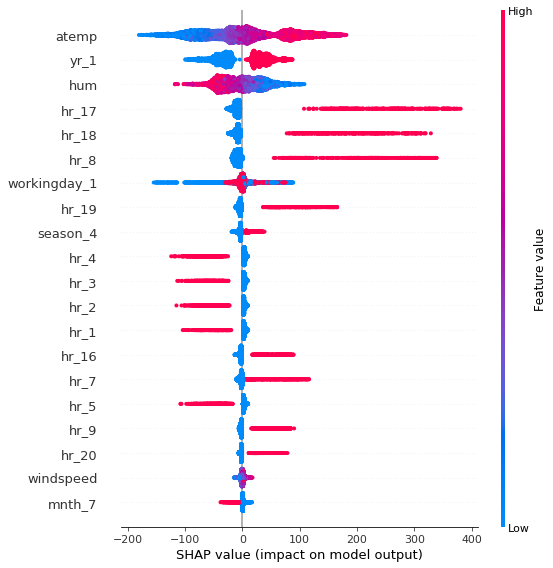

In [68]:
shap.summary_plot(shap_values, X_train)

In [69]:
shap.initjs()

In [70]:
i=10

expected_value = shap_values[i,-1]

shap.force_plot(expected_value, shap_values[i,:], X_train.iloc[i,:])